<a href="https://colab.research.google.com/github/ajay47847/Internship_Task/blob/main/stft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

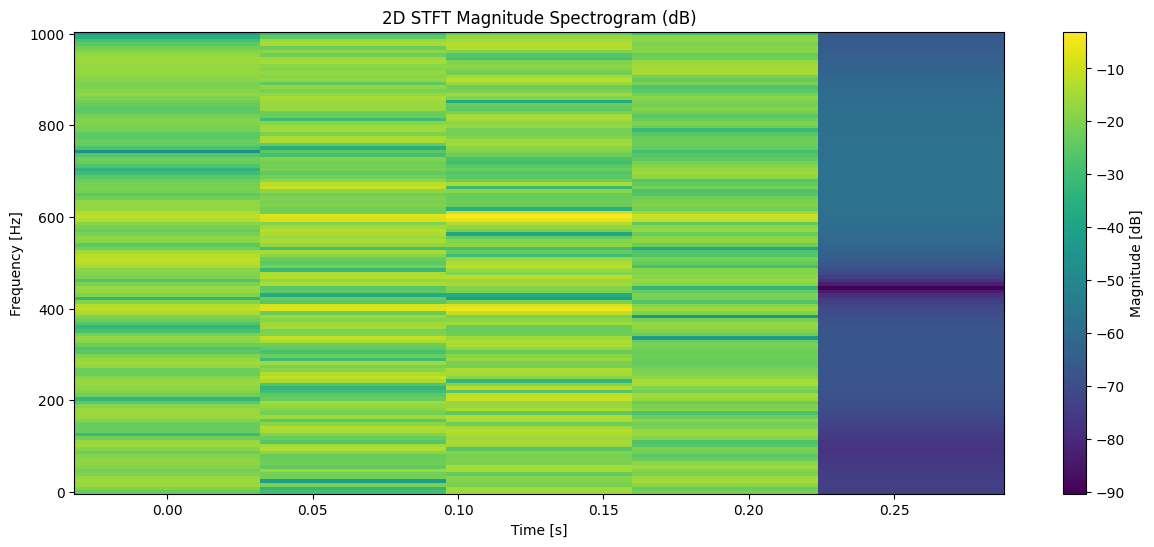

Total samples: 400
Segment length: 256
Overlap: 128
Expected number of segments: 5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import windows
fs = 2000
duration=0.2
t = np.arange(0,duration,1/fs)
signal1 = np.sin(2 * np.pi * 400 * t)
signal2 = np.sin(2 * np.pi * 600 * t)
signal3 = signal1 + signal2

power=signal3**2
signal3_avg_power=np.mean(power)
signal3_avg_power_db=10*np.log10(signal3_avg_power)
mean_noise=0

snr_db1=-5
noise_db1=signal3_avg_power_db - snr_db1
noise_watts1=10**(noise_db1/10)
noise1=np.random.normal(mean_noise,np.sqrt(noise_watts1),size=len(signal3))
noise_signal1=signal3 + noise1

plt.figure(figsize=(15, 6))

# Length of each segment
nperseg = 256
# Number of points to overlap between segments
noverlap=128
# nfft=The number of data points used in each block for the FFT

f, t, Zxx = stft(noise_signal1, fs, window='hann', nfft=nperseg, nperseg=nperseg,noverlap=noverlap,scaling='spectrum',return_onesided=True,padded=True)

Zxx_dB = 20 * np.log10(np.abs(Zxx))

plt.pcolormesh(t, f, Zxx_dB, shading='auto', cmap='viridis')
plt.title('2D STFT Magnitude Spectrogram (dB)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude [dB]')
plt.show()

print(f"Total samples: {len(signal3)}")
print(f"Segment length: {nperseg}")
print(f"Overlap: {noverlap}")
print(f"Expected number of segments: {len(t)}")